# Imports modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression


## Imports data and formats columns

In [3]:
nbafull = pd.read_csv("https://raw.githubusercontent.com/rwadswo12/Sample-Project-CS504/main/Cleaned%20NBA%20Stats%20Balanced.csv") #full dataset in datatable
nbafull = nbafull.astype({"Season": str}) #Changing column type. use this line to change additional columns to other types.

nbaap = nbafull.drop(['W' , 'L' , '+/-'], axis = 1) #datatable with only averages and percentages.

print(nbaap.info())
print()
print()
print('Columns in datatable:')
print()
print(nbaap.columns)
print()
print('Values in datatable:')
print()
print()
print(nbaap.values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772 entries, 0 to 771
Data columns (total 27 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Season     772 non-null    object 
 1   Team       772 non-null    object 
 2   Champion?  742 non-null    float64
 3   GP         772 non-null    int64  
 4   WIN %      772 non-null    float64
 5   MIN        772 non-null    float64
 6   PTS        772 non-null    float64
 7   FGM        772 non-null    float64
 8   FGA        772 non-null    float64
 9   FG%        772 non-null    float64
 10  3PM        772 non-null    float64
 11  3PA        772 non-null    float64
 12  3P%        772 non-null    float64
 13  FTM        772 non-null    float64
 14  FTA        772 non-null    float64
 15  FT%        772 non-null    float64
 16  OREB       772 non-null    float64
 17  DREB       772 non-null    float64
 18  REDB       772 non-null    float64
 19  AST        772 non-null    float64
 20  TOV       

### Filters data

In [4]:
nba22 = nbaap[nbaap["Season"] == "2022"] #filters by year
nba20 = nbaap[nbaap["Season"] == "2020"]
nba18 = nbaap[nbaap["Season"] == "2018"]
nba17 = nbaap[nbaap["Season"] == "2017"]
nba16 = nbaap[nbaap["Season"] == "2016"]
nba15 = nbaap[nbaap["Season"] == "2015"]
nba14 = nbaap[nbaap["Season"] == "2014"]
nba13 = nbaap[nbaap["Season"] == "2013"]
nba12 = nbaap[nbaap["Season"] == "2012"]
nba11 = nbaap[nbaap["Season"] == "2011"]
nba10 = nbaap[nbaap["Season"] == "2010"]
nba09 = nbaap[nbaap["Season"] == "2009"]
nba08 = nbaap[nbaap["Season"] == "2008"]
nba07 = nbaap[nbaap["Season"] == "2007"]
nba06 = nbaap[nbaap["Season"] == "2006"]
nba05 = nbaap[nbaap["Season"] == "2005"]
nba04 = nbaap[nbaap["Season"] == "2004"]
nba03 = nbaap[nbaap["Season"] == "2003"]
nba02 = nbaap[nbaap["Season"] == "2002"]
nba01 = nbaap[nbaap["Season"] == "2001"]
nba00 = nbaap[nbaap["Season"] == "2000"]
nba99 = nbaap[nbaap["Season"] == "1999"]
nba98 = nbaap[nbaap["Season"] == "1998"]
nba97 = nbaap[nbaap["Season"] == "1997"]

nbahawks = nbaap[nbaap["Team"] == "Atlanta Hawks"] #Filters by team. These filters may not be needed but they are available. We can delete after 
nbaceltics = nbaap[nbaap["Team"] == "Boston Celtics"]
nbanets = nbaap[nbaap["Team"] == "Brooklyn Nets"]
nbahornets = nbaap[nbaap["Team"] == "Charlotte Hornets"]
nbabulls = nbaap[nbaap["Team"] == "Chicago Bulls"]
nbacavs = nbaap[nbaap["Team"] == "Cleveland Cavaliers"]
nbamavs = nbaap[nbaap["Team"] == "Dallas Mavericks"]
nbanuggs = nbaap[nbaap["Team"] == "Denver Nuggets"]
nbapistons = nbaap[nbaap["Team"] == "Detroit Pistons"]
nbagsw = nbaap[nbaap["Team"] == "Golden State Warriors"]
nbarockets = nbaap[nbaap["Team"] == "Houston Rockets"]
nbapacers = nbaap[nbaap["Team"] == "Indiana Pacers"]
nbaclippers = nbaap[nbaap["Team"] == "Los Angeles Clippers"]
nbalakers = nbaap[nbaap["Team"] == "Los Angeles Lakers"]
nbagrizz = nbaap[nbaap["Team"] == "Memphis Grizzlies"]
nbaheat = nbaap[nbaap["Team"] == "Miami Heat"]
nbabucks = nbaap[nbaap["Team"] == "Milwaukee Bucks"]
nbawolves = nbaap[nbaap["Team"] == "Minnesota Timberwolves"]
nbapelicans = nbaap[nbaap["Team"] == "New Orleans Pelicans"]
nbaknicks = nbaap[nbaap["Team"] == "New York Knicks"]
nbaokc = nbaap[nbaap["Team"] == "Oklahoma City Thunder"]
nbamagic = nbaap[nbaap["Team"] == "Orlando Magic"]
nba76ers = nbaap[nbaap["Team"] == "Philadelphia 76ers"]
nbasuns = nbaap[nbaap["Team"] == "Phoenix Suns"]
nbablazers = nbaap[nbaap["Team"] == "Portland Trail Blazers"]
nbakings = nbaap[nbaap["Team"] == "Sacramento Kings"]
nbaspurs = nbaap[nbaap["Team"] == "San Antonio Spurs"]
nbaraptors = nbaap[nbaap["Team"] == "Toronto Raptors"]
nbajazz = nbaap[nbaap["Team"] == "Utah Jazz"]
nbawizards = nbaap[nbaap["Team"] == "Washington Wizards"]

## Natasha's Section

## Generate correlation coefficient for all independent variables and apply heatmap

In [5]:
nbawo2022 = nbaap[nbaap['Season'] != '2022'] ## Remove current season stats
var = nbawo2022.drop(nbawo2022.columns[[0, 1, 2, 3]], axis=1) ## Dataset of independent variables. Dropped Season, Team, Games Played, and Champion

## Dataframe for correlation coefficient
corr=var.corr()
corr.head()

,WIN %,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,...,DREB,REDB,AST,TOV,STL,BLK,BLKA,PF,PFD,Salary
WIN %,1.000000,-0.026034,0.289581,0.250691,-0.090387,0.582701,0.176304,0.112094,0.457423,0.165044,...,0.310066,0.236163,0.331097,-0.341511,0.112173,0.220855,-0.479856,-0.202332,0.009090,0.130159
MIN,-0.026034,1.000000,-0.080117,-0.072732,-0.060990,-0.047231,-0.099236,-0.095068,-0.025175,0.037653,...,-0.044376,-0.043579,-0.070342,0.058060,-0.048488,-0.006800,0.000426,0.062687,0.003883,-0.072768
PTS,0.289581,-0.080117,1.000000,0.938501,0.783526,0.615023,0.830700,0.812643,0.381980,0.052555,...,0.741626,0.548620,0.635549,-0.273494,0.033666,0.023756,-0.169662,-0.250987,0.515858,0.730817
FGM,0.250691,-0.072732,0.938501,1.000000,0.839821,0.648597,0.718193,0.699381,0.344743,-0.166613,...,0.712068,0.558555,0.700225,-0.304522,0.048615,0.049498,-0.173126,-0.293259,0.476670,0.687690
FGA,-0.090387,-0.060990,0.783526,0.839821,1.000000,0.132773,0.692662,0.718746,0.041815,-0.291571,...,0.660197,0.656615,0.519196,-0.252928,0.082341,-0.010126,0.089216,-0.240329,0.379171,0.631410


<AxesSubplot:>

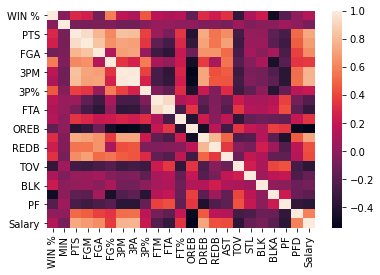

In [6]:
## Heatmap of correlation coefficient
sns.heatmap(corr)

## Removed one of two features that have a correlation higher than 0.9. I've read it can be between .85-.9 and can be adjusted


In [7]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
                
selected_columns = var.columns[columns]
selected_columns.shape                

(20,)

In [8]:
## 20 features remaining after multicollinearity is addressed
final = var[selected_columns]
final.head()

,WIN %,MIN,PTS,FGA,FG%,3PM,3P%,FTM,FT%,OREB,DREB,REDB,AST,TOV,STL,BLK,BLKA,PF,PFD,Salary
1,0.569,48.3,113.7,87.2,46.8,12.4,37.3,19.7,81.2,10.6,35.1,45.6,24.1,13.2,7.0,4.8,5.0,19.3,19.8,118804016
2,0.299,48.6,111.8,90.6,44.9,12.0,33.3,18.5,79.0,9.9,33.4,43.3,24.0,16.2,7.8,5.1,6.4,23.1,21.0,85600106
3,0.354,48.4,113.3,91.8,45.1,13.0,35.2,17.6,75.2,11.6,34.5,46.1,25.8,17.0,8.2,5.1,5.5,23.6,22.2,79180081
4,0.354,48.4,113.3,91.8,45.1,13.0,35.2,17.6,75.2,11.6,34.5,46.1,25.8,17.0,8.2,5.1,5.5,23.6,22.2,99992696
5,0.524,48.5,103.2,84.4,45.1,8.9,34.1,18.1,72.8,10.3,34.1,44.3,23.6,15.8,8.2,4.8,5.2,18.2,21.6,96315163


## Looks at p value to further refine feature selection. Referenced here: https://towardsdatascience.com/feature-selection-correlation-and-p-value-da8921bfb3cf


In [9]:
selected_columns = selected_columns[1:20].values

import statsmodels.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns

In [10]:
SL = 0.05
data_modeled, selected_columns = backwardElimination(final.iloc[:,1:].values, final.iloc[:,0].values, SL, selected_columns)

In [11]:
final = pd.DataFrame(data = data_modeled, columns = selected_columns)

In [12]:
final.head()

,MIN,PTS,FGA,3P%,FTM,FT%,OREB,DREB,AST,TOV,STL,BLKA,PF,Salary
0,48.3,113.7,87.2,37.3,19.7,81.2,10.6,35.1,24.1,13.2,7.0,5.0,19.3,118804016.0
1,48.6,111.8,90.6,33.3,18.5,79.0,9.9,33.4,24.0,16.2,7.8,6.4,23.1,85600106.0
2,48.4,113.3,91.8,35.2,17.6,75.2,11.6,34.5,25.8,17.0,8.2,5.5,23.6,79180081.0
3,48.4,113.3,91.8,35.2,17.6,75.2,11.6,34.5,25.8,17.0,8.2,5.5,23.6,99992696.0
4,48.5,103.2,84.4,34.1,18.1,72.8,10.3,34.1,23.6,15.8,8.2,5.2,18.2,96315163.0


In [13]:
final.shape

(742, 14)

## Dependent variable distribution for each independent variable

In [14]:
target = pd.DataFrame()
target['Champion?'] = nbawo2022.iloc[:,2]
target = target['Champion?'].apply(np.int64)


KeyError: 'Champion?'

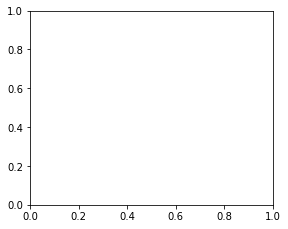

In [15]:
## Plot distribution of dependent variable for each independent variable.
fig = plt.figure(figsize = (20, 25))
j = 0
for i in final.columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.histplot(final[i][target['Champion?']==0], color='r', label = 'Lose')
    sns.histplot(final[i][target['Champion?']==1], color='g', label = 'Win')
    plt.legend(loc='best')
fig.suptitle('NBA Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()


## Define Current Season Dataframes: ID and Independent Variables

In [16]:
# We will have two dataframes of the current data
# The first will be the ID dataframe so we are able to tie the output to the correct teams
# The second will be the dataframe of independent variables still remaining after filtering out collinearity
# I'm just listing out all the columns to keep for now, but I'm sure there's a way to reference the column names in final
ID_2022 = nba22[['Season', 'Team']]
X_2022 = nba22[["MIN", "PTS", "FGA", "3P%", "FTM", "FT%", "OREB", "DREB", "AST", "TOV", "STL", "BLKA", "PF", "Salary"]]

## Random Forest Regression

In [17]:
X = final
y = target

In [18]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [19]:
y_train.isnull().any()

False

In [20]:
#Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9237668161434978


In [21]:
# View confusion matrix for test data and predictions
confusion_matrix(y_test, y_pred)

array([[205,   0],
       [ 17,   1]], dtype=int64)

In [22]:
# View the classification report for test data and predictions
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       205
           1       1.00      0.06      0.11        18

    accuracy                           0.92       223
   macro avg       0.96      0.53      0.53       223
weighted avg       0.93      0.92      0.89       223



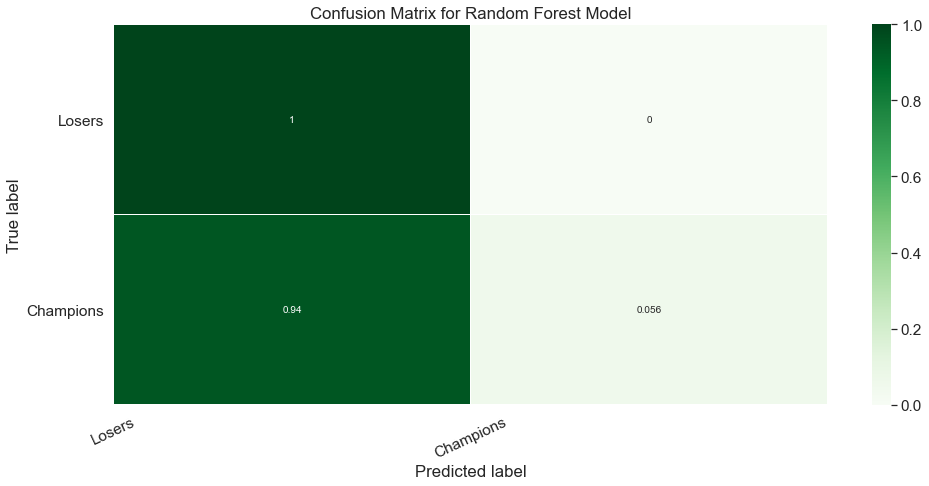

In [23]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Losers', 'Champions']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

### Predict the Probabilities Each Team will be the 2022 Champion

In [24]:
prediction = clf.predict_proba(X_2022)
pred_2022_df = pd.DataFrame(prediction, columns = ['Prob of 0', 'Prob of 1'])
ID_2022 = ID_2022.reset_index(drop = True)
RF_pred_2022 = ID_2022.join(pred_2022_df)
RF_pred_2022.sort_values(by=['Prob of 1'], ascending = False)

,Season,Team,Prob of 0,Prob of 1
9,2022,Golden State Warriors,0.31,0.69
2,2022,Brooklyn Nets,0.57,0.43
13,2022,Los Angeles Lakers,0.57,0.43
24,2022,Portland Trail Blazers,0.64,0.36
29,2022,Washington Wizards,0.71,0.29
28,2022,Utah Jazz,0.73,0.27
27,2022,Toronto Raptors,0.74,0.26
22,2022,Philadelphia 76ers,0.77,0.23
15,2022,Miami Heat,0.79,0.21
23,2022,Phoenix Suns,0.80,0.20


## Logistic Regression

In [25]:
X = final
y = target
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test
y_train.isnull().any()

False

In [26]:
# Instantiate the model (using the default parameters)
logreg = LogisticRegression()

# Fit the model with data
logreg.fit(X_train, y_train)

# Predict on the test set
y_predict = logreg.predict(X_test)

In [27]:
# Generate a confusion maxtrix to see the accuracy of the model
conf_matrix = metrics.confusion_matrix(y_test, y_predict)
conf_matrix

array([[212,   0],
       [ 11,   0]], dtype=int64)

In [28]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       212
           1       0.00      0.00      0.00        11

    accuracy                           0.95       223
   macro avg       0.48      0.50      0.49       223
weighted avg       0.90      0.95      0.93       223



C:\Users\Karyna\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Karyna\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Karyna\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
# Determine the accuracy of the model
print("Accuracy:", metrics.accuracy_score(y_test, y_predict))

Accuracy: 0.9506726457399103


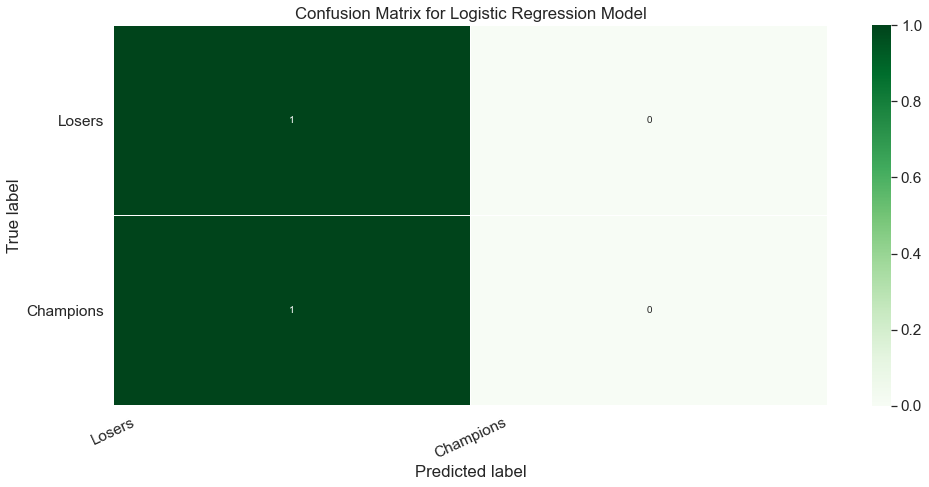

In [30]:
# Reshape confusion matrix data
conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Losers', 'Champions']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

### Predict the Probabilities Each Team will be the 2022 Champion

In [31]:
pred_2022 = logreg.predict_proba(X_2022)
pred_2022_df = pd.DataFrame(pred_2022, columns = ['Prob of 0', 'Prob of 1'])
ID_2022 = ID_2022.reset_index(drop = True)
final_pred_2022 = ID_2022.join(pred_2022_df)
final_pred_2022.sort_values(by=['Prob of 1'], ascending = False)

,Season,Team,Prob of 0,Prob of 1
20,2022,Oklahoma City Thunder,0.939984,0.060016
14,2022,Memphis Grizzlies,0.982013,0.017987
18,2022,New Orleans Pelicans,0.982520,0.017480
3,2022,Charlotte Hornets,0.983661,0.016339
26,2022,San Antonio Spurs,0.984239,0.015761
19,2022,New York Knicks,0.984857,0.015143
6,2022,Dallas Mavericks,0.985350,0.014650
21,2022,Orlando Magic,0.985644,0.014356
8,2022,Detroit Pistons,0.987807,0.012193
10,2022,Houston Rockets,0.988404,0.011596
